# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Aprendizaje Supervisado**

## Entregable: MODELO DE CLASIFICACIÓN PARTE 3

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra
   ------

## Modelo de clasificación: XGBoost
-------

In [1]:
# Importación de modulos

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint
from utils import evaluate

from scipy.stats import norm

from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, \
    LeaveOneOut, LeavePOut,train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import recall_score, accuracy_score, precision_score, \
    f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, \
    classification_report, ConfusionMatrixDisplay, accuracy_score, ConfusionMatrixDisplay, \
    classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import missingno as msno

sns.set_context('talk')
warnings.filterwarnings("ignore")

### Lectura del dataset

In [69]:
# Carga de los datasets (train y test)
train_titanic = pd.read_csv('CK_train.csv')
test_titanic = pd.read_csv('CK_test.csv')

### Extracción y resguardo de las etiquetas del set de entrenamiento

In [70]:
y = train_titanic['Transported']
y.replace({False: 0, True: 1},inplace=True)

### Lectura del dataset con los datos curados (Entrenamiento y prueba)
 - En el dataframe g_dataset cargamos los datos curados
 - IMPORTANTE: No confundir g_dataset con el homonimo de etapas previas de estudio(ej: EDA y curado).
 - g_dataset contiene datos preparados para aplicar directamente sobre el desarrollo de los modelos de clasificación

In [71]:
g_dataset = pd.read_csv('g_dataset_c.csv')
g_dataset.shape

(8693, 36)

In [72]:
# scaler = StandardScaler()
# scaler.fit(g_dataset)
# g_dataset=scaler.transform(g_dataset)


### Separacion de los grupo de entrenamiento y prueba globales.
 - X representa el set de entrenamiento global.
 - A partir del mismo se generará el conjunto de entrenamiento y test para el desarrollo de los diferentes modelos.

In [73]:
X = g_dataset[: len(train_titanic)]
X_to_predict = g_dataset[len(train_titanic):]

# El set de datos disponible para el estudio y desarrollo de los modelos de clasificación
X.shape, y.shape

((7823, 36), (7823,))

In [74]:
# Los datos a predecir y realizar el submmit a Kaggle son:
X_to_predict.shape

(870, 36)

### Planteo General de distintos modelos de clasificación

In [75]:
clfs =  [DecisionTreeClassifier(random_state=10),
        RandomForestClassifier(random_state=10),
        LogisticRegression(random_state=10),
        MLPClassifier(random_state=10),
        XGBClassifier(random_state=10),
        GaussianNB(),
        LinearSVC(random_state=10),
        SGDClassifier(random_state=10)]

names = ['Arbol de decisión',
        'Random Forest',
        'Regresión Logística',
        'Perceptrón multicapa',
        'XGBoost',
        'Naive Bayes',
        'Suport Vector Machine',
        'Stochastic Gradient Descent']

trained_models = []
accuracy_models = []


#### Generación de los datos de entrenamiento y prueba a fin de estudiar los distintos modelos

In [76]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)



### Estudio del perfomance de los distintos modelos

In [77]:
from tabulate import tabulate

list_report = []

for clf, name in zip(clfs, names):

    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_train)
    accuracy_train = round( accuracy_score(y_train, train_predictions) * 100.0, 2)

    test_predictions = clf.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, test_predictions) * 100.0, 2)

    list_report.append([name, accuracy_train, accuracy_test])

print(tabulate(list_report, headers=["Modelo","Acc Train [%]", "Acc Test [%]"]))

Modelo                         Acc Train [%]    Acc Test [%]
---------------------------  ---------------  --------------
Arbol de decisión                      99.97           75.59
Random Forest                          99.97           81.85
Regresión Logística                    78.68           80.26
Perceptrón multicapa                   67.18           65.75
XGBoost                                95.16           81.92
Naive Bayes                            76.08           77
Suport Vector Machine                  50.69           50.54
Stochastic Gradient Descent            78.41           80


### Seleccionamos XGBoost para profundizar su desarrollo

In [78]:
clf=XGBClassifier(random_state=10).fit(X_train, y_train)

In [79]:
test_predictions = clf.predict(X_test)
accuracy_test = round(accuracy_score(y_test, test_predictions) * 100.0, 2)
accuracy_test

81.92

In [80]:
print('Los parametros del modelo bajo análisis son:\n')
pprint(clf.get_params())

Los parametros del modelo bajo análisis son:

{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'binary:logistic',
 'predictor': 'auto',
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validate_parameters': 1,
 'verbosity': None}


### Buscando los mejores hiperparámetros del modelo...

### HYPEROPT
 - Es una poderosa biblioteca de Python que procura obtener los mejores valores posibles que producen el mínimo de la función de pérdida.
 - La técnica de optimización bayesiana utiliza Hyperopt para ajustar los hiperparámetros del modelo.

#### El proceso de optimización:
 - Inicializar espacio de dominio: son los valores de entrada sobre los que queremos buscar.
 - Definir función objetivo: puede ser cualquier función que queramos minimizar.
 - En este caso, queremos minimizar el error de validación de un modelo de aprendizaje automático con respecto a los hiperparámetros.
 - Si el valor real es la precisión, entonces queremos maximizarlo (la función debería devolver el negativo de esa métrica).
3. Algoritmo de optimización: Es el método utilizado para construir la función objetivo sustituta y elegir los siguientes valores a evaluar.
4. Resultados: pares de puntajes o valores que el algoritmo usa para construir el modelo.


In [81]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 10
    }

In [82]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [83]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 25,
                        trials = trials)

SCORE:                                                
0.7507987220447284                                    
SCORE:                                                                           
0.7463258785942491                                                               
SCORE:                                                                           
0.7488817891373802                                                               
SCORE:                                                                           
0.7514376996805112                                                               
SCORE:                                                                           
0.7488817891373802                                                               
SCORE:                                                                           
0.7476038338658147                                                               
SCORE:                                                                

### Resultado

In [84]:
best_hyperparams['max_depth']=int(best_hyperparams['max_depth'])
print("The best hyperparameters are : ","\n")
print(best_hyperparams)


The best hyperparameters are :  

{'colsample_bytree': 0.7154204654071739, 'gamma': 1.0221815843755566, 'max_depth': 10, 'min_child_weight': 10.0, 'reg_alpha': 46.0, 'reg_lambda': 0.30949247679346764}


In [85]:
base_model = XGBClassifier(**best_hyperparams)

base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Pred: [0 0 1 1 0 0 1 0 1 0]
TEST: [0 0 1 1 0 0 1 0 1 0]
error [0 0 0 0 0 0 0 0 0 0]
18.849840255591054
Model Performance
Average Error: 0.1885 degrees.
Accuracy = 81.15%.


In [86]:
test_predictions = base_model.predict(X_to_predict)
submission = pd.DataFrame(list(zip(test_titanic["PassengerId"], test_predictions)),
                          columns=["PassengerId", "Transported"])
submission = pd.DataFrame(list(zip(test_titanic["PassengerId"], test_predictions)),
                          columns=["PassengerId", "Transported"])
submission['Transported'] = np.where(test_predictions > 0.5, 1, 0)



Accuracy train: 80.49%
Accuracy test: 81.15%


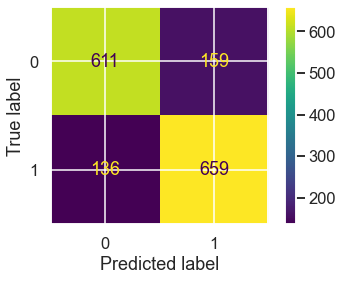

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       770
           1       0.81      0.83      0.82       795

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



In [87]:
train_predictions = np.where(base_model.predict(X_train) > 0.5, 1, 0)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train: %.2f%%" % (accuracy * 100.0))

test_predictions = np.where(base_model.predict(X_test) > 0.5, 1, 0)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test: %.2f%%" % (accuracy * 100.0))

ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,test_predictions))

———–FINAL PARTE 5 de 5————–